### Data Loading

In [1]:
import pandas as pd

# Read the file with automatic separator detection
data = pd.read_csv('HD_Complete_Data.csv', sep = ';')

# Separate the target variable (Y) from the predictors (X)
Y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

# I Explorative Analysis of the dataset

### Exploration of target variable Y

Descriptive statistics of Y:
count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Missing values in Y:
0



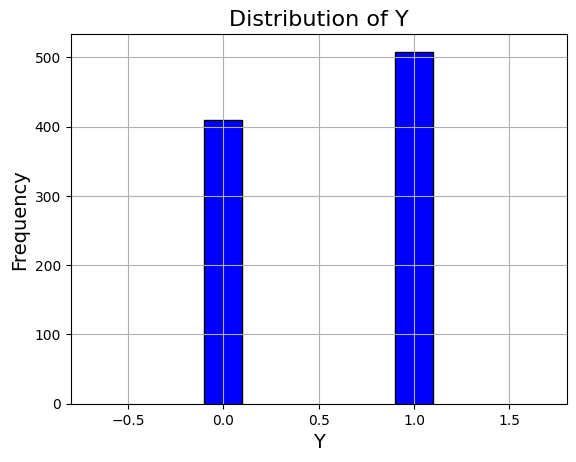

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display descriptive statistics of the target variable (Y) to summarize its distribution.
print("Descriptive statistics of Y:")
print(Y.describe())
print()

# Check for missing values in the target variable to ensure data completeness.
print("Missing values in Y:")
print(Y.isnull().sum())
print()

# Plot the distribution of the target variable (Y) to visualize its overall shape and spread.
bin_edges = np.linspace(Y.min() - 0.5, Y.max() + 0.5, num=3)  # Adjust bin edges for better centering
# Adjust the histogram for centered bars

# Add some padding to the plot
plt.xlim(bin_edges[0] - 0.3, bin_edges[-1] + 0.3)
plt.bar(bin_edges[:-1] + 0.5, np.histogram(Y, bins=bin_edges)[0], width=0.2, align='center', color="blue", edgecolor="black")
plt.title("Distribution of Y", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()



We observe that the target variable, which represents whether the patient has cardiopathy or not, is slightly imbalanced. There are slightly more positive cases than negative cases.

There are no missing values

### Exploration of pradictors X

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


Predictors dimensions (X): (918, 11)
Total missing values in X: 0

Key statistics for each numerical predictor:
             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2 

Key statistics for categorical predictors:
               count unique     top freq
Sexe             918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460


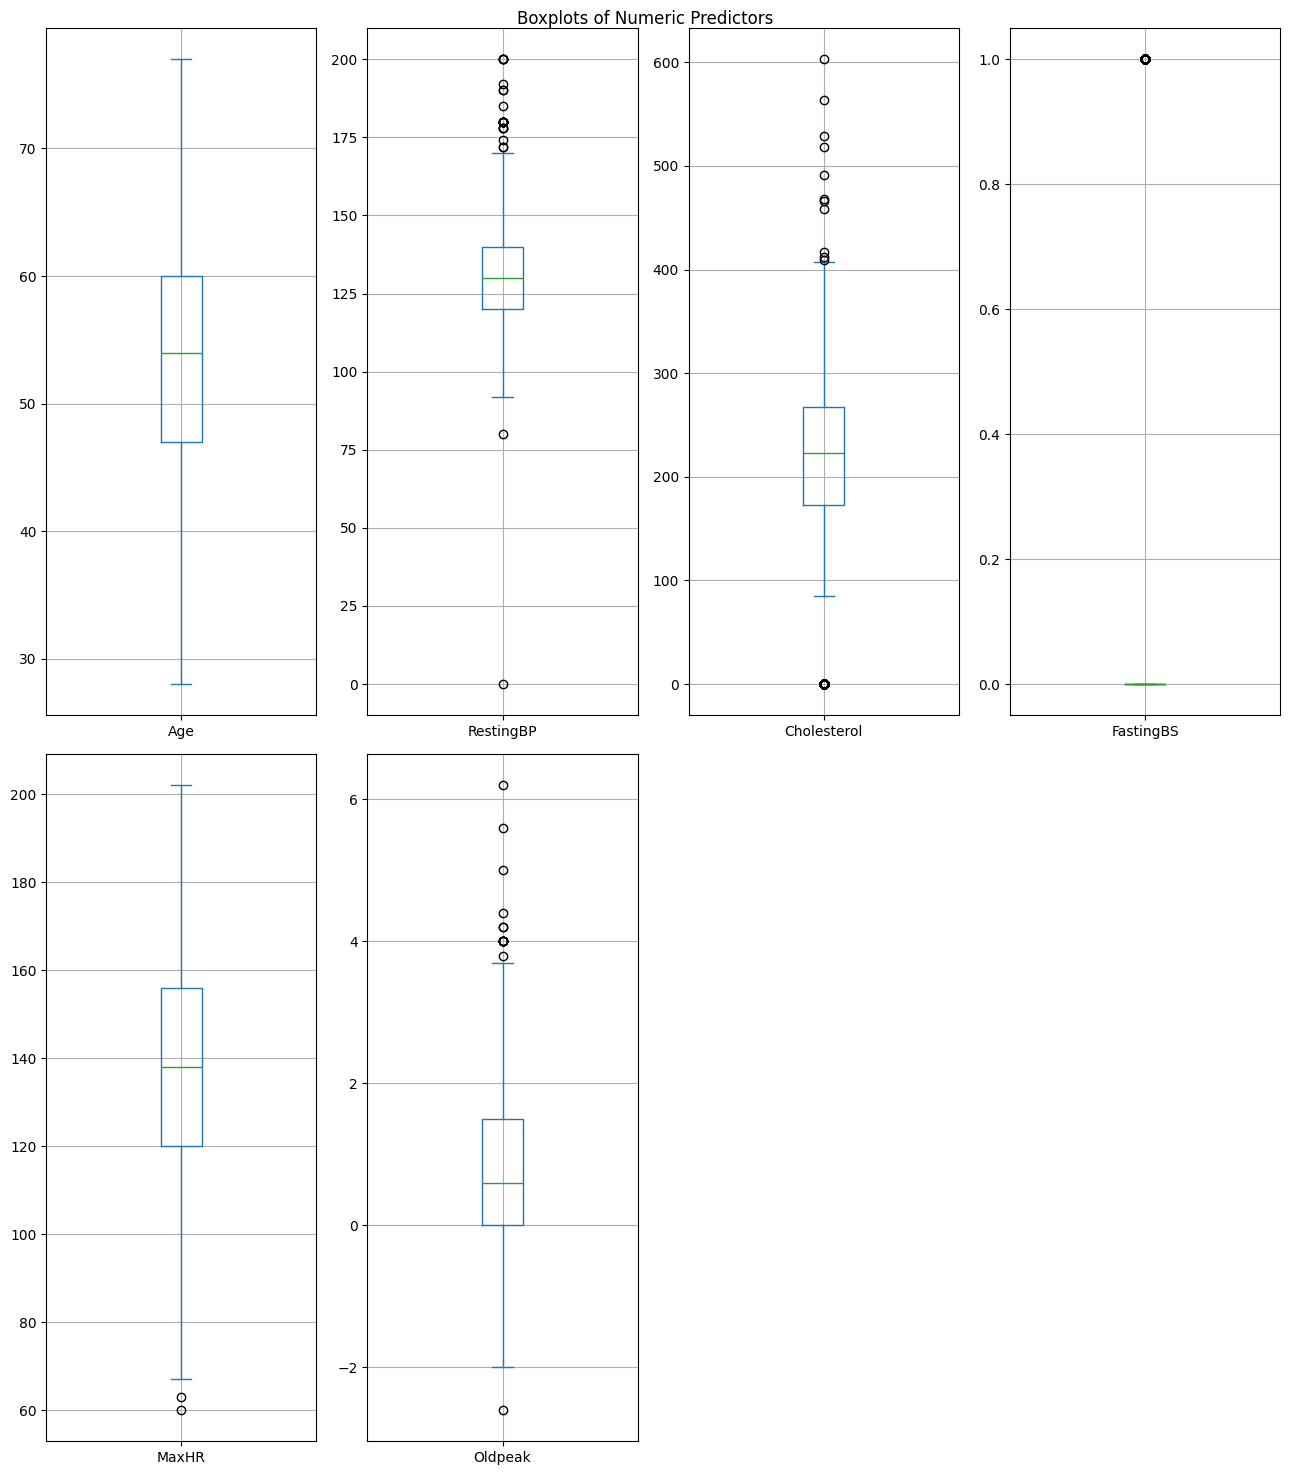

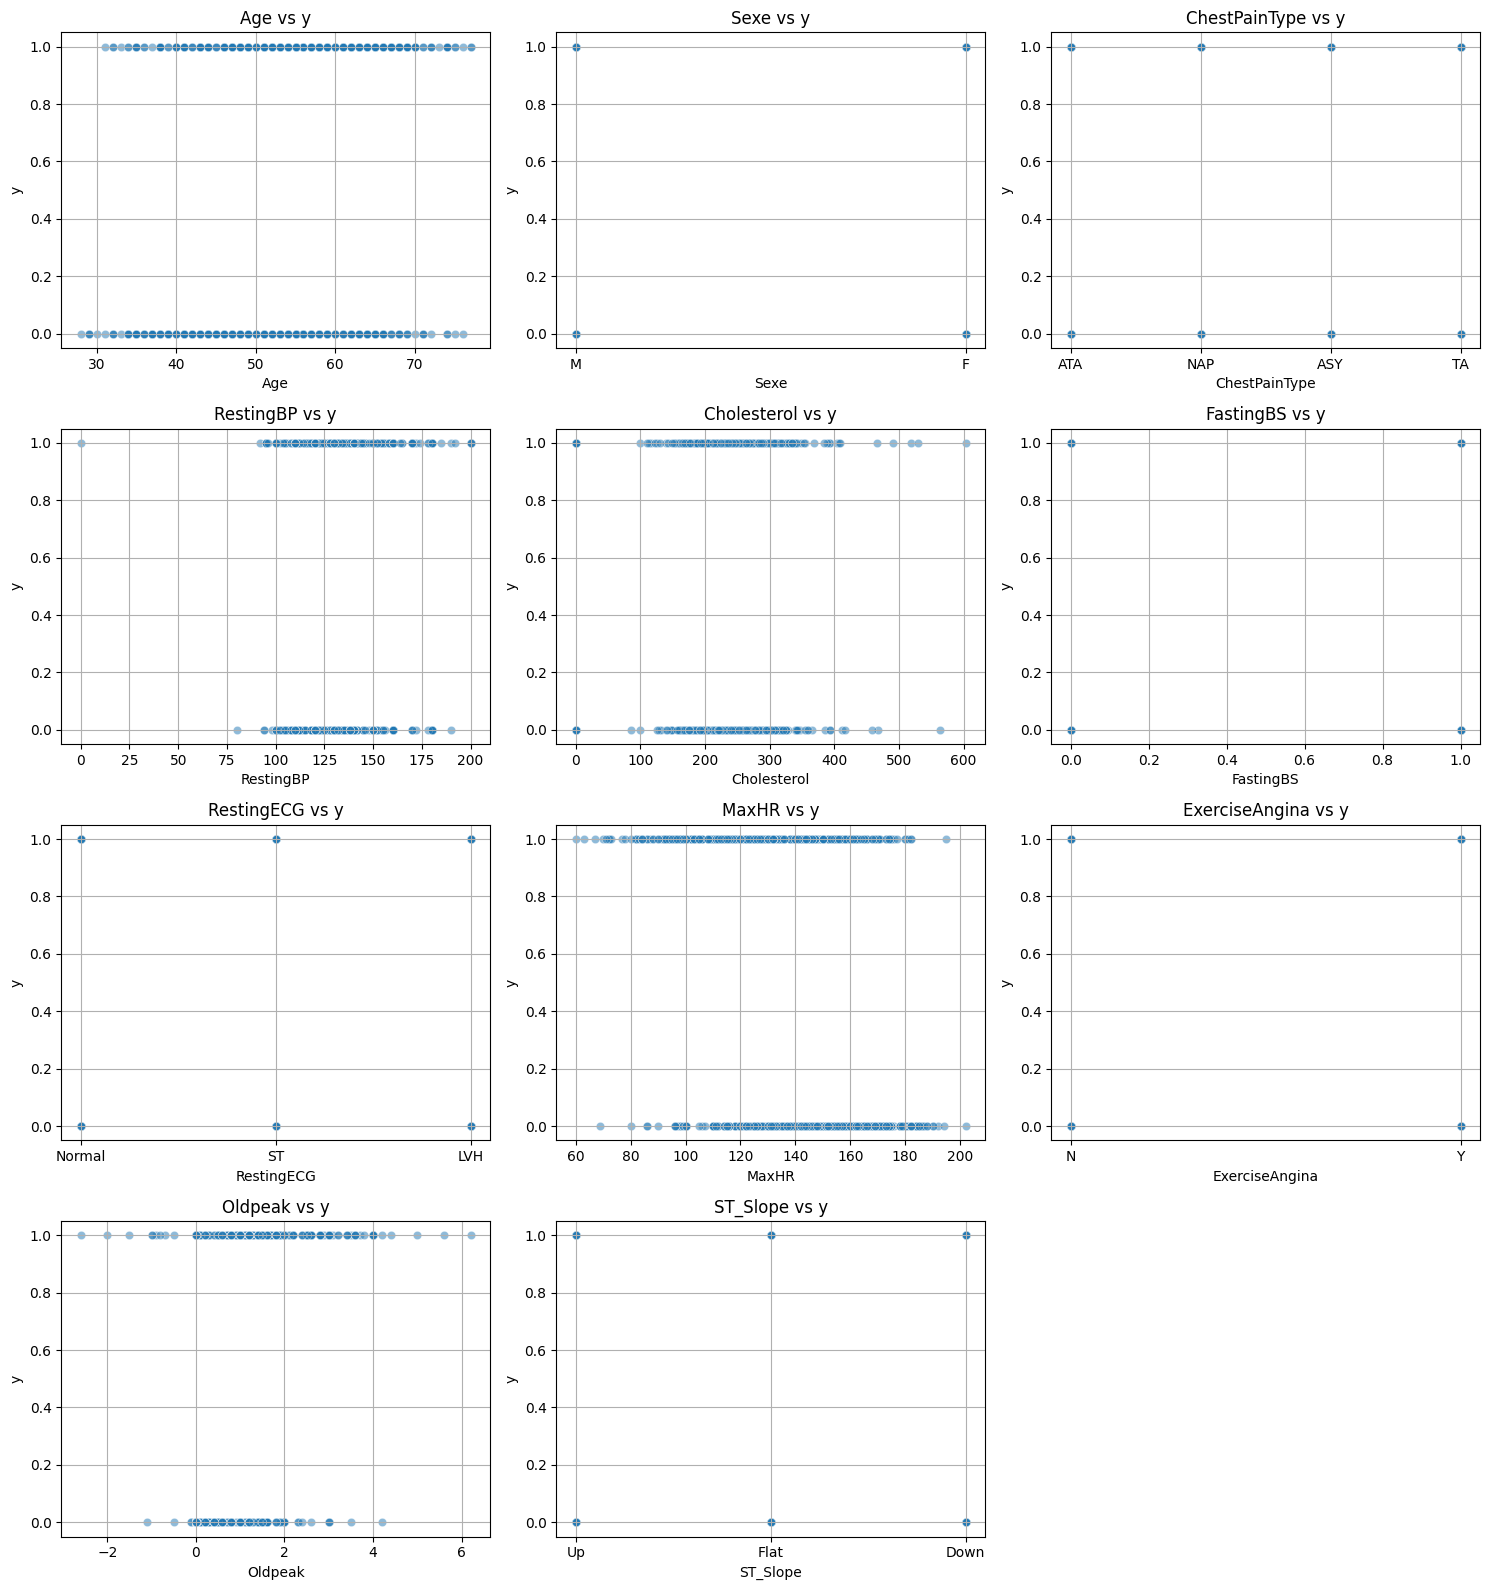

In [23]:
# Display the first few rows of the predictors DataFrame to inspect the column names and get an overview of the data
display(X.head())

### Display basic dataset information to get a general overview
print(f"Predictors dimensions (X): {X.shape}")

### Check for missing values
print(f"Total missing values in X: {X.isnull().sum().sum()}\n")

### Display essential statistics for each numeric feature
print("Key statistics for each numerical predictor:")
print(X.describe().T, "\n")

### Display essential info for each categorical feature
categorical_columns = X.select_dtypes(include=['object', 'category'])
print("Key statistics for categorical predictors:")
print(categorical_columns.describe().T)

### Plot boxplots for numeric variables
numeric_columns = X.select_dtypes(include=['float64', 'int64'])
# Create subplots and plot boxplots
numeric_columns.plot(kind='box', subplots=True, layout=(2, 4), figsize=(13, 15), grid=True, title="Boxplots of Numeric Predictors")
plt.tight_layout()
plt.show()


### Plot each variable against the target variable (y)
# List of explanatory variables
features = X.columns
# Define the number of columns and rows for the subplots
n_features = len(X)
n_cols = 3  # Number of columns per figure
n_rows = int(np.ceil(len(features) / n_cols))
# Figure size (adjust as needed)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=X[feature], y=Y, alpha=0.5)
    plt.title(f'{feature} vs y')
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.grid(True)

plt.tight_layout()
plt.show()




Overall, the features are approximately normally distributed. Some features, such as RestingBP and FastingBS, exhibit a few outliers. For other features, the points beyond the whiskers are likely valid data points rather than outliers.

The scatterplots show that globally, the features do not exhibit strong and clearly visible distribution differences based on the target variable. However, some features, such as Cholesterol and MaxHR, show potential predictive power, although it is not immediately obvious.

There a no missing values